In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

from dispersant_screener.utils import read_pickle, get_random_exploration_bl
import numpy as np 
from functools import partial
from matplotlib import animation, rc

COLORS = [
    "#ffbe0b", 
    "#fb5607", 
    "#ff006e",
    "#3a86ff", 
]

In [2]:
history = read_pickle('../work/20200922-172346-history.pkl')#read_pickle('../work/20200830-112437-history.pkl')

In [25]:
hvs = np.load('../work/20200922-1723460.05_0.05_0.05_100-hypervolumes.npy')[0]

In [4]:
y_train = np.load('../work/20200922-1723460.05_0.05_0.05_100-y_train.npy')

In [5]:
y_test = np.load('../work/20200922-1723460.05_0.05_0.05_100-y_test.npy')

In [6]:
X_test = np.load('../work/20200922-1723460.05_0.05_0.05_100-X_test.npy')

In [7]:
y = np.vstack([y_train, y_test])

In [8]:
np.argmin(np.linalg.norm(X_test - np.mean(X_test, axis=0), axis=1))

1491

In [9]:
def get_summary_stats_time(history): 
    pareto = []
    non_pareto = []
    sampled = []
   
    pareto_indices = []
    non_pareto_indices = []
    sampled_indices = []
    
    for array in history['pareto']:
        pareto.append(sum(array))
        pareto_indices.append(np.where(array==1)[0])
        
    for array in history['non_pareto']:
        non_pareto.append(sum(array))
        non_pareto_indices.append(np.where(array==1)[0])
    
    for array in history['sampled']:
        sampled.append(sum(array))
        sampled_indices.append(np.where(array==1)[0])
        
    history_ = {}
        
    return pareto, non_pareto, sampled, pareto_indices, non_pareto_indices, sampled_indices

In [10]:
def animate_2d(i, ax, y, pareto_indices, non_pareto_indices, sampled_indices):
    ax.scatter(y[:,0], y[:,1], c='gray', s=1)
    ax.scatter(y[non_pareto_indices[i],0], y[non_pareto_indices[i],1], c='red', label='discarded', s=1)
    ax.scatter(y[sampled_indices[i],0], y[sampled_indices[i],1], c='blue', label='sampled', s=3)
    ax.scatter(y[pareto_indices[i],0], y[pareto_indices[i],1], c='green', label='Pareto', s=3)


In [11]:
pareto, non_pareto, sampled, pareto_indices, non_pareto_indices, sampled_indices = get_summary_stats_time(history)

In [12]:
unclassiefied = [len(history['pareto'][0])- pareto[i] - non_pareto[i] for i in range(len(pareto_indices))]

In [16]:
random_explorations = []

for i in range(5000):
    hv_random = get_random_exploration_bl(y)
    random_explorations.append(hv_random)

In [17]:
np.save('random_explorations_new.npy', random_explorations)

In [13]:
random_explorations = np.load('random_explorations.npy')

In [14]:
random_exploration_median = np.median(random_explorations, axis=0)

In [15]:
random_exploration_median

array([ 768.98588163,  908.18818754,  982.74127339, ..., 1521.00940378,
       1521.00940378, 1521.01109009])

In [21]:
reference_hv = 1535

In [22]:
random_exploration_std = np.std(random_explorations, axis=0)

In [26]:
np.where((reference_hv-hvs)/reference_hv * 100 < 5)

(array([57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
        74, 75, 76, 77, 78, 79, 80, 81, 82]),)

In [27]:
import seaborn as sns
colors = sns.color_palette("tab10")

/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  if sys.path[0] == '':
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  del sys.path[0]
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in

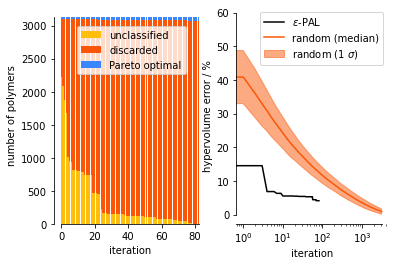

In [28]:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 1]})
ax[0].bar(range(len(pareto)), unclassiefied, label='unclassified', color=COLORS[0])
ax[0].bar(range(len(non_pareto)), non_pareto, bottom=unclassiefied, label='discarded', color=COLORS[1])
ax[0].bar(range(len(pareto)), 
          pareto, bottom=np.array(non_pareto)+ np.array(unclassiefied), 
          label='Pareto optimal', color=COLORS[3])
ax[0].set_xlabel('iteration')
ax[1].set_xlabel('iteration')
ax[0].set_ylabel('number of polymers')
ax[1].set_ylabel('hypervolume error / %')

ax[0].spines['left'].set_smart_bounds(True)
ax[0].spines['bottom'].set_smart_bounds(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)


ax[1].spines['left'].set_smart_bounds(True)
ax[1].spines['bottom'].set_smart_bounds(True)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[1].plot((reference_hv-hvs)/reference_hv * 100, label=r'$\epsilon$-PAL', c='black')
ax[1].plot((reference_hv-np.array(random_exploration_median))/reference_hv * 100, 
           label='random (median)', c=COLORS[1])
ax[1].fill_between(np.arange(len(y)),
                   (reference_hv-np.array(random_exploration_median + random_exploration_std))/reference_hv * 100, (reference_hv-np.array(random_exploration_median - random_exploration_std))/reference_hv * 100, 
                   label=r'random (1 $\sigma$)', color=COLORS[1], alpha=.5)
#ax[1].plot(ratios)
ax[1].legend()
ax[1].set_xscale('log')
#fig.tight_layout()


ax[0].legend(loc='right', bbox_to_anchor=(0.9,0.8))


fig.savefig('barplot_draft_epsilon_005_all_coregionalized.pdf', bbox_inches='tight')

In [55]:
from IPython.display import HTML

In [56]:
ani = animation.FuncAnimation(fig, animate,frames=range(301)) 
plt.show()

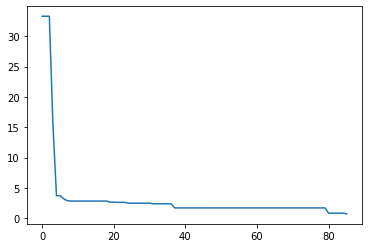

In [59]:
plt.plot((reference_hv-hvs)/reference_hv * 100)

In [24]:
import plotly.graph_objects as go

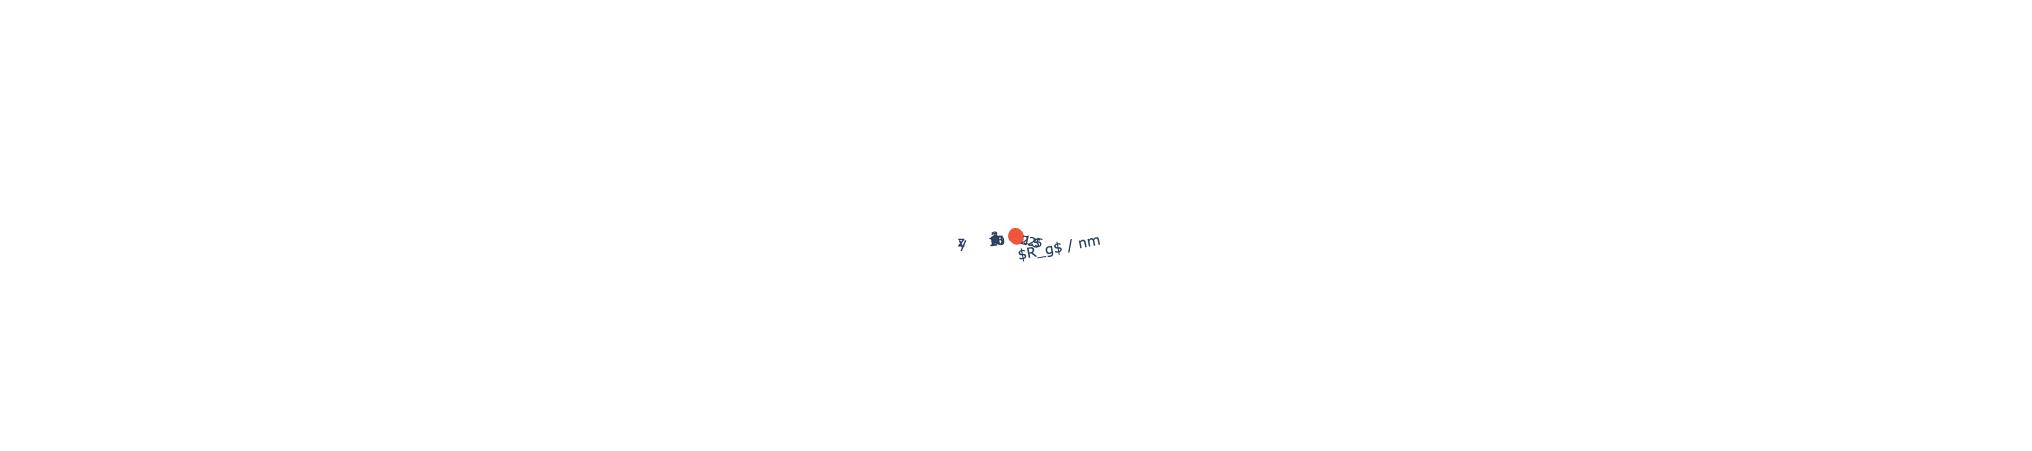

In [37]:
fig = go.Figure()

trace_1 = go.Mesh3d(x=y[:,0], y=y[:,1], z=y[:,2], opacity=0.70, alphahull=3)
trace_2 = go.Scatter3d(x=y[pareto_indices[-1],0]+0.05, y=y[pareto_indices[-1],1]+0.1, z=y[pareto_indices[-1],2]+0.05, 
                       mode='markers')
fig.add_trace(trace_1)
fig.add_trace(trace_2)


fig.update_layout(
    scene = dict(
        xaxis = dict(title=r'$R_g$ / nm')))


# fig.update_layout(dict(scence=dict('xaxis' = dict('title' = r'$R_g$ / nm'))))

fig.show()

In [24]:
xi = np.linspace(x.min()-1, x.max()+1, 100)
yi = np.linspace(y.min()-1, y.max()+1, 100)
zi = griddata(x, y, z, xi, yi, interp='linear')

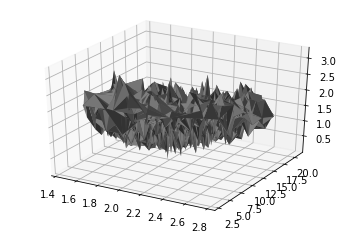

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(y[:,0], y[:,1], y[:,2], color='gray')

In [40]:
from scipy.interpolate import griddata


X, Y = np.meshgrid(y[:,0], y[:,1])
Z = griddata((y[:,0], y[:,1]), y[:,2], (X, Y), method='cubic')

/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Z contains NaN values. This may result in rendering artifacts.



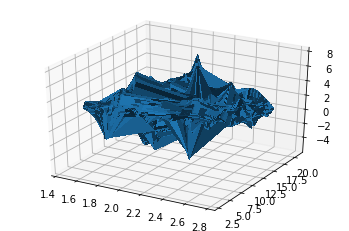

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,linewidth=0, antialiased=False)

In [29]:
from dispersant_screener.utils import is_pareto_efficient
pareto_true_indices = is_pareto_efficient(-y)

In [30]:
pareto_indices_classified = is_pareto_efficient(-y[pareto_indices[-1]])

###### fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y[:,0], y[:,1], y[:,2], alpha=.3, s=1, c='gray',  label='all')
ax.plot_trisurf(y[:,0], y[:,1], y[:,2], color='gray', shade=True, 
                linewidth=0.01, edgecolor='none', alpha=.03)
ax.scatter(y[sampled_indices[-1],0], y[sampled_indices[-1],1], y[sampled_indices[-1],2], s=20, label='sampled', c=COLORS[3])



# True pareto frontier 
ax.scatter([3.1] * len(y[pareto_true_indices,0]), y[pareto_true_indices,1], y[pareto_true_indices,2], c=COLORS[2], 
            label='true Pareto frontier', s=1)
ax.scatter(y[pareto_true_indices, 0], [-10] * len(y[pareto_true_indices, 1]), y[pareto_true_indices,2], c=COLORS[2], 
            label='_nolegend_', s=1)
ax.scatter(y[pareto_true_indices,0], y[pareto_true_indices,1], [-1] * len(y[pareto_true_indices,2]), c=COLORS[2], 
            label='_nolegend_', s=1)


# e-PAL recovered
ax.scatter([3.1]*len(y[pareto_indices[-1],0][pareto_indices_classified]), 
           y[pareto_indices[-1],1][pareto_indices_classified],
           y[pareto_indices[-1],2][pareto_indices_classified], 
           s=10, label='_nolegend_', c=COLORS[1])

ax.scatter(y[pareto_indices[-1],0][pareto_indices_classified],
           y[pareto_indices[-1],1][pareto_indices_classified], 
           [-1.0] * len(y[pareto_indices[-1],2][pareto_indices_classified]), 
           s=10, label='_nolegend_', c=COLORS[1])

ax.scatter(y[pareto_indices[-1],0][pareto_indices_classified],
           [-10] * len(y[pareto_indices[-1],1][pareto_indices_classified]), 
           y[pareto_indices[-1],2][pareto_indices_classified], 
           s=10, label='_nolegend_', c=COLORS[1])


# all Pareto classified 
ax.scatter(y[pareto_indices[-1],0], y[pareto_indices[-1],1], y[pareto_indices[-1],2],s=50, c=COLORS[1],
           label='classified $\epsilon$-Pareto optimal')




# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')

ax.view_init(320, 115)
ax.legend(loc='upper right')
ax.grid(False)
ax.set_zlim(3.2, -1.0)
ax.set_xlim(1.4, 3.1)
ax.set_ylim(-10, 20)

ax.set_xlabel(r'$R_g$ / nm', labelpad=5)
ax.set_ylabel(r'$-\Delta G_\mathrm{ads}$ / $k_\mathrm{B}T$', labelpad=10)
ax.set_zlabel(r'$\Delta G_\mathrm{rep}$ / $k_\mathrm{B}T$', labelpad=10)


fig.tight_layout()

fig.savefig('3d_pareto_trisurf.pdf', bbox_inches='tight')

In [61]:
len(pareto)

86

In [62]:
def animate_3d(i, graph_discarded, graph_sampled, graph_pareto, y, pareto_indices, non_pareto_indices, sampled_indices):
    graph_discarded._offsets3d = (y[non_pareto_indices[i],0], y[non_pareto_indices[i],1], y[non_pareto_indices[i],2])
    graph_sampled._offsets3d = (y[sampled_indices[i],0], y[sampled_indices[i],1], y[sampled_indices[i],2])
    graph_pareto._offsets3d = (y[pareto_indices[i],0], y[pareto_indices[i],1], y[pareto_indices[i],2])


In [63]:
def get_3d_fig_ax(y, pareto_indices, non_pareto_indices, sampled_indices, xlabel=r'$R_g$', 
                  ylabel=r'$-\Delta G_\mathrm{ads}$', zlabel=r'$\Delta G_\mathrm{rep}$'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    graph = ax.scatter(y[:,0], y[:,1], y[:,2], c='gray', s=1)
    graph_discarded = ax.scatter(y[non_pareto_indices[0],0], y[non_pareto_indices[0],1], y[non_pareto_indices[0],2], c='red', label='discarded', s=1)
    graph_sampled = ax.scatter(y[sampled_indices[0],0], y[sampled_indices[0],1], y[sampled_indices[0],2], c='blue', label='sampled', s=3)
    graph_pareto = ax.scatter(y[pareto_indices[0],0], y[pareto_indices[0],1], y[pareto_indices[0],2], c='green', label='Pareto', s=10)
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    ax.grid(False)
    
    return graph_discarded, graph_sampled, graph_pareto, fig, ax

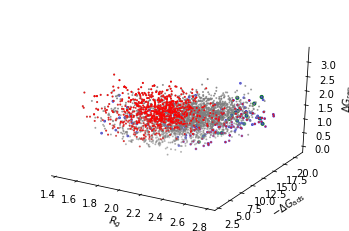

In [64]:
graph_discarded, graph_sampled, graph_pareto, fig, ax = get_3d_fig_ax(y, pareto_indices=pareto_indices, non_pareto_indices=non_pareto_indices, sampled_indices=sampled_indices)

In [69]:
animate = partial(animate_3d, graph_discarded=graph_discarded, graph_sampled=graph_sampled, graph_pareto=graph_pareto, y=y, pareto_indices=pareto_indices, non_pareto_indices=non_pareto_indices, sampled_indices=sampled_indices)

In [70]:
ani = animation.FuncAnimation(fig, animate,frames=range(86)) 

In [71]:
rc('animation', html='jshtml')
rc

HTML(ani.to_jshtml())

In [72]:
ani.save('animation.gif', writer='imagemagick', fps=40)